In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df=pd.read_csv('C:\\Users\\DELL\\OneDrive\\Desktop\\DS Project\\PRJ Sales Forecasting\\train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df['Item_Weight'].max()

21.35

In [6]:
# Filling Nan Values

In [7]:

df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
Outlet_size=df[['Outlet_Size']]
Outlet_size

,Outlet_Size
0,Medium
1,Medium
2,Medium
3,NaN
4,High
...,...
8518,High
8519,NaN
8520,Small
8521,Medium


In [9]:
Item_Weight=df[['Item_Weight']]
Item_Weight

,Item_Weight
0,9.300
1,5.920
2,17.500
3,19.200
4,8.930
...,...
8518,6.865
8519,8.380
8520,10.600
8521,7.210


In [10]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="most_frequent")
si=si.fit_transform(Outlet_size)
new_o=pd.DataFrame(si,columns=['Outlet_size'])
new_o.isna()

,Outlet_size
0,False
1,False
2,False
3,False
4,False
...,...
8518,False
8519,False
8520,False
8521,False


In [11]:
si_item=SimpleImputer(strategy="mean")
si_item=si_item.fit_transform(Item_Weight)
new_i=pd.DataFrame(si_item,columns=['Item_Weight'])
new_i.isna().sum()

Item_Weight    0
dtype: int64

In [12]:
df1=df.drop(columns=['Item_Weight','Outlet_Size'])
df1

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Tier 3,Supermarket Type2,1845.5976


In [13]:
new_col=pd.concat([new_o,new_i],axis=1)
df1=pd.concat([df1,new_col],axis=1)
df1

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_size,Item_Weight
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,Medium,9.300
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,Medium,5.920
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,Medium,17.500
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800,Medium,19.200
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052,High,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834,High,6.865
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Tier 2,Supermarket Type1,549.2850,Medium,8.380
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Tier 2,Supermarket Type1,1193.1136,Small,10.600
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Tier 3,Supermarket Type2,1845.5976,Medium,7.210


In [14]:
df1.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_size                  0
Item_Weight                  0
dtype: int64

In [15]:
# Label Encoding

In [16]:
df1.head(5)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_size,Item_Weight
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,Medium,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,Medium,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,Medium,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800,Medium,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052,High,8.93


In [17]:
df1['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [18]:
df1['Item_Fat_Content']=df1['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')

In [19]:
df1['Item_Fat_Content']=df1['Item_Fat_Content'].replace(['reg'],'Regular')

In [20]:
df1['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [21]:
df1['Item_Fat_Content']=df1['Item_Fat_Content'].astype('category').cat.codes
df1.head(5)
# Low fat : 0 , Regular : 1

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_size,Item_Weight
0,FDA15,0,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,Medium,9.30
1,DRC01,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,Medium,5.92
2,FDN15,0,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,Medium,17.50
3,FDX07,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800,Medium,19.20
4,NCD19,0,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052,High,8.93


In [22]:
df1=df1.drop(columns=['Item_Identifier','Outlet_Identifier'])
df1

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_size,Item_Weight
0,0,0.016047,Dairy,249.8092,1999,Tier 1,Supermarket Type1,3735.1380,Medium,9.300
1,1,0.019278,Soft Drinks,48.2692,2009,Tier 3,Supermarket Type2,443.4228,Medium,5.920
2,0,0.016760,Meat,141.6180,1999,Tier 1,Supermarket Type1,2097.2700,Medium,17.500
3,1,0.000000,Fruits and Vegetables,182.0950,1998,Tier 3,Grocery Store,732.3800,Medium,19.200
4,0,0.000000,Household,53.8614,1987,Tier 3,Supermarket Type1,994.7052,High,8.930
...,...,...,...,...,...,...,...,...,...,...
8518,0,0.056783,Snack Foods,214.5218,1987,Tier 3,Supermarket Type1,2778.3834,High,6.865
8519,1,0.046982,Baking Goods,108.1570,2002,Tier 2,Supermarket Type1,549.2850,Medium,8.380
8520,0,0.035186,Health and Hygiene,85.1224,2004,Tier 2,Supermarket Type1,1193.1136,Small,10.600
8521,1,0.145221,Snack Foods,103.1332,2009,Tier 3,Supermarket Type2,1845.5976,Medium,7.210


In [23]:
df1['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [24]:
df1['Outlet_Location_Type']=df1['Outlet_Location_Type'].astype('category').cat.codes
df1

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_size,Item_Weight
0,0,0.016047,Dairy,249.8092,1999,0,Supermarket Type1,3735.1380,Medium,9.300
1,1,0.019278,Soft Drinks,48.2692,2009,2,Supermarket Type2,443.4228,Medium,5.920
2,0,0.016760,Meat,141.6180,1999,0,Supermarket Type1,2097.2700,Medium,17.500
3,1,0.000000,Fruits and Vegetables,182.0950,1998,2,Grocery Store,732.3800,Medium,19.200
4,0,0.000000,Household,53.8614,1987,2,Supermarket Type1,994.7052,High,8.930
...,...,...,...,...,...,...,...,...,...,...
8518,0,0.056783,Snack Foods,214.5218,1987,2,Supermarket Type1,2778.3834,High,6.865
8519,1,0.046982,Baking Goods,108.1570,2002,1,Supermarket Type1,549.2850,Medium,8.380
8520,0,0.035186,Health and Hygiene,85.1224,2004,1,Supermarket Type1,1193.1136,Small,10.600
8521,1,0.145221,Snack Foods,103.1332,2009,2,Supermarket Type2,1845.5976,Medium,7.210


In [25]:
df1['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [26]:
df1['Outlet_Type']=df1['Outlet_Type'].replace(['Supermarket Type1', 'Supermarket Type2','Supermarket Type3'],'Supermarket')

In [27]:
df1['Outlet_Type']=df1['Outlet_Type'].astype('category').cat.codes

In [28]:
df1['Outlet_size']=df1['Outlet_size'].astype('category').cat.codes
df1

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_size,Item_Weight
0,0,0.016047,Dairy,249.8092,1999,0,1,3735.1380,1,9.300
1,1,0.019278,Soft Drinks,48.2692,2009,2,1,443.4228,1,5.920
2,0,0.016760,Meat,141.6180,1999,0,1,2097.2700,1,17.500
3,1,0.000000,Fruits and Vegetables,182.0950,1998,2,0,732.3800,1,19.200
4,0,0.000000,Household,53.8614,1987,2,1,994.7052,0,8.930
...,...,...,...,...,...,...,...,...,...,...
8518,0,0.056783,Snack Foods,214.5218,1987,2,1,2778.3834,0,6.865
8519,1,0.046982,Baking Goods,108.1570,2002,1,1,549.2850,1,8.380
8520,0,0.035186,Health and Hygiene,85.1224,2004,1,1,1193.1136,2,10.600
8521,1,0.145221,Snack Foods,103.1332,2009,2,1,1845.5976,1,7.210


In [29]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [30]:
df1['Item_Type']=df1['Item_Type'].replace(['Dairy','Meat', 'Fruits and Vegetables','Baking Goods', 'Snack Foods','Frozen Foods','Breads','Starchy Foods','Seafood','Canned'],'Food')
df1['Item_Type']=df1['Item_Type'].replace(['Household','Breakfast', 'Health and Hygiene','Others'],'Non Food')
df1['Item_Type']=df1['Item_Type'].replace(['Soft Drinks','Hard Drinks'],'Drinks')

In [31]:
df1['Item_Type']

0           Food
1         Drinks
2           Food
3           Food
4       Non Food
          ...   
8518        Food
8519        Food
8520    Non Food
8521        Food
8522      Drinks
Name: Item_Type, Length: 8523, dtype: object

In [32]:
df1

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_size,Item_Weight
0,0,0.016047,Food,249.8092,1999,0,1,3735.1380,1,9.300
1,1,0.019278,Drinks,48.2692,2009,2,1,443.4228,1,5.920
2,0,0.016760,Food,141.6180,1999,0,1,2097.2700,1,17.500
3,1,0.000000,Food,182.0950,1998,2,0,732.3800,1,19.200
4,0,0.000000,Non Food,53.8614,1987,2,1,994.7052,0,8.930
...,...,...,...,...,...,...,...,...,...,...
8518,0,0.056783,Food,214.5218,1987,2,1,2778.3834,0,6.865
8519,1,0.046982,Food,108.1570,2002,1,1,549.2850,1,8.380
8520,0,0.035186,Non Food,85.1224,2004,1,1,1193.1136,2,10.600
8521,1,0.145221,Food,103.1332,2009,2,1,1845.5976,1,7.210


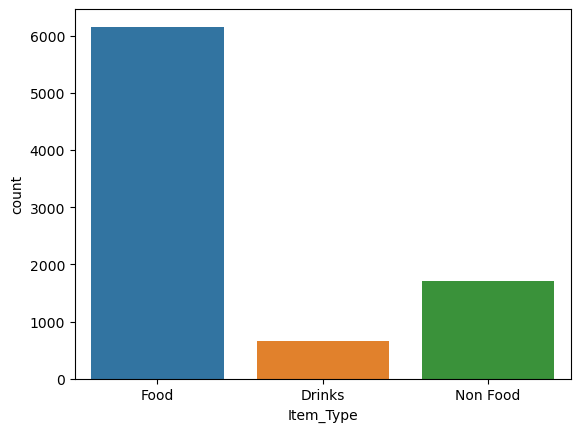

In [33]:
sns.countplot(x=df1['Item_Type'])
plt.show()

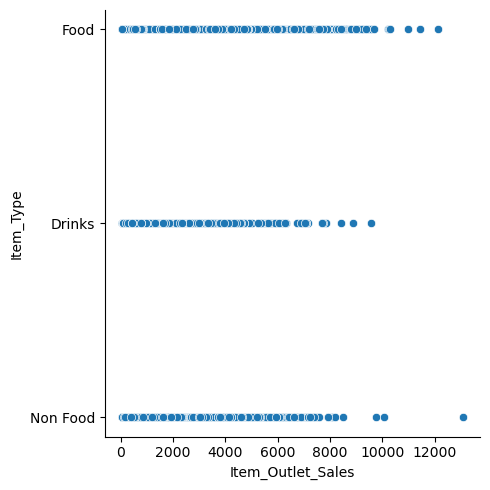

In [34]:
sns.relplot(x=df1['Item_Outlet_Sales'],y=df1['Item_Type'])
plt.show()

In [35]:
df1['Item_Type']=df1['Item_Type'].astype('category').cat.codes
df1

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_size,Item_Weight
0,0,0.016047,1,249.8092,1999,0,1,3735.1380,1,9.300
1,1,0.019278,0,48.2692,2009,2,1,443.4228,1,5.920
2,0,0.016760,1,141.6180,1999,0,1,2097.2700,1,17.500
3,1,0.000000,1,182.0950,1998,2,0,732.3800,1,19.200
4,0,0.000000,2,53.8614,1987,2,1,994.7052,0,8.930
...,...,...,...,...,...,...,...,...,...,...
8518,0,0.056783,1,214.5218,1987,2,1,2778.3834,0,6.865
8519,1,0.046982,1,108.1570,2002,1,1,549.2850,1,8.380
8520,0,0.035186,2,85.1224,2004,1,1,1193.1136,2,10.600
8521,1,0.145221,1,103.1332,2009,2,1,1845.5976,1,7.210


In [36]:
df2=pd.get_dummies(df1,columns=['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Type','Outlet_size'])
df2

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_size_0,Outlet_size_1,Outlet_size_2
0,0.016047,249.8092,1999,3735.1380,9.300,1,0,0,1,0,1,0,0,0,1,0,1,0
1,0.019278,48.2692,2009,443.4228,5.920,0,1,1,0,0,0,0,1,0,1,0,1,0
2,0.016760,141.6180,1999,2097.2700,17.500,1,0,0,1,0,1,0,0,0,1,0,1,0
3,0.000000,182.0950,1998,732.3800,19.200,0,1,0,1,0,0,0,1,1,0,0,1,0
4,0.000000,53.8614,1987,994.7052,8.930,1,0,0,0,1,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.056783,214.5218,1987,2778.3834,6.865,1,0,0,1,0,0,0,1,0,1,1,0,0
8519,0.046982,108.1570,2002,549.2850,8.380,0,1,0,1,0,0,1,0,0,1,0,1,0
8520,0.035186,85.1224,2004,1193.1136,10.600,1,0,0,0,1,0,1,0,0,1,0,0,1
8521,0.145221,103.1332,2009,1845.5976,7.210,0,1,0,1,0,0,0,1,0,1,0,1,0


In [37]:
df2.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_size_0,Outlet_size_1,Outlet_size_2
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914,12.857645,0.647307,0.352693,0.077320,0.722164,0.200516,0.280183,0.326763,0.393054,0.127068,0.872932,0.109351,0.610466,0.280183
std,0.051598,62.275067,8.371760,1706.499616,4.226124,0.477836,0.477836,0.267114,0.447959,0.400410,0.449115,0.469057,0.488457,0.333069,0.333069,0.312098,0.487673,0.449115
min,0.000000,31.290000,1985.000000,33.290000,4.555000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.026989,93.826500,1987.000000,834.247400,9.310000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.053931,143.012800,1999.000000,1794.331000,12.857645,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.094585,185.643700,2004.000000,3101.296400,16.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,0.328391,266.888400,2009.000000,13086.964800,21.350000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
df2['Item_Outlet_Sales']=np.log1p(df2['Item_Outlet_Sales'])
df2

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_size_0,Outlet_size_1,Outlet_size_2
0,0.016047,249.8092,1999,8.225808,9.300,1,0,0,1,0,1,0,0,0,1,0,1,0
1,0.019278,48.2692,2009,6.096776,5.920,0,1,1,0,0,0,0,1,0,1,0,1,0
2,0.016760,141.6180,1999,7.648868,17.500,1,0,0,1,0,1,0,0,0,1,0,1,0
3,0.000000,182.0950,1998,6.597664,19.200,0,1,0,1,0,0,0,1,1,0,0,1,0
4,0.000000,53.8614,1987,6.903451,8.930,1,0,0,0,1,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.056783,214.5218,1987,7.929984,6.865,1,0,0,1,0,0,0,1,0,1,1,0,0
8519,0.046982,108.1570,2002,6.310436,8.380,0,1,0,1,0,0,1,0,0,1,0,1,0
8520,0.035186,85.1224,2004,7.085159,10.600,1,0,0,0,1,0,1,0,0,1,0,0,1
8521,0.145221,103.1332,2009,7.521100,7.210,0,1,0,1,0,0,0,1,0,1,0,1,0


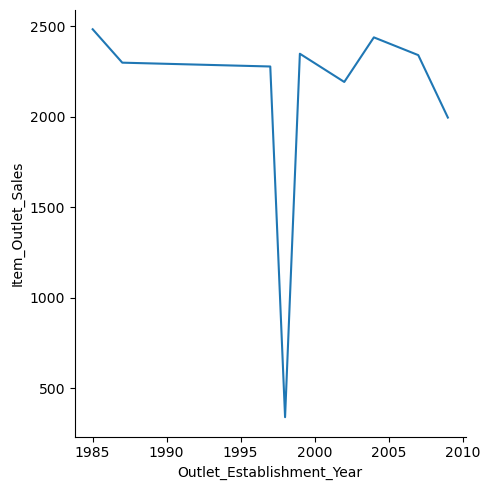

In [39]:
sns.relplot(data=df1,x='Outlet_Establishment_Year',y='Item_Outlet_Sales',kind='line',ci=None)
plt.show()

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Weight'>

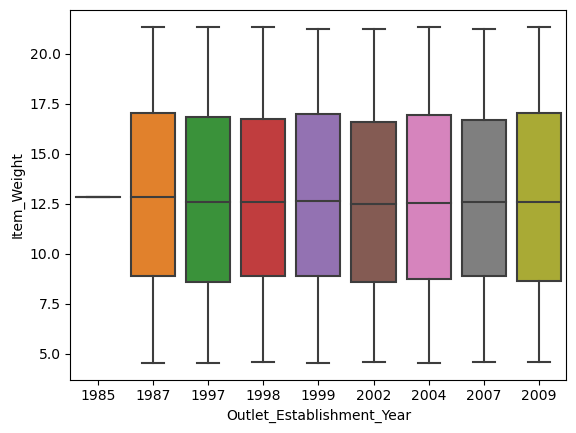

In [40]:
sns.boxplot(data=df2,x='Outlet_Establishment_Year',y='Item_Weight')


In [41]:
df2_col=df2.columns
df2_col

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales', 'Item_Weight', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Item_Type_0', 'Item_Type_1', 'Item_Type_2',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_size_0', 'Outlet_size_1', 'Outlet_size_2'],
      dtype='object')

In [42]:
x=df2.copy
x=df2.drop(columns=['Outlet_Establishment_Year','Item_Outlet_Sales'])
x


,Item_Visibility,Item_MRP,Item_Weight,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_size_0,Outlet_size_1,Outlet_size_2
0,0.016047,249.8092,9.300,1,0,0,1,0,1,0,0,0,1,0,1,0
1,0.019278,48.2692,5.920,0,1,1,0,0,0,0,1,0,1,0,1,0
2,0.016760,141.6180,17.500,1,0,0,1,0,1,0,0,0,1,0,1,0
3,0.000000,182.0950,19.200,0,1,0,1,0,0,0,1,1,0,0,1,0
4,0.000000,53.8614,8.930,1,0,0,0,1,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.056783,214.5218,6.865,1,0,0,1,0,0,0,1,0,1,1,0,0
8519,0.046982,108.1570,8.380,0,1,0,1,0,0,1,0,0,1,0,1,0
8520,0.035186,85.1224,10.600,1,0,0,0,1,0,1,0,0,1,0,0,1
8521,0.145221,103.1332,7.210,0,1,0,1,0,0,0,1,0,1,0,1,0


In [43]:
y=df2[['Item_Outlet_Sales']]
y

,Item_Outlet_Sales
0,8.225808
1,6.096776
2,7.648868
3,6.597664
4,6.903451
...,...
8518,7.929984
8519,6.310436
8520,7.085159
8521,7.521100


In [44]:
x_col=x.columns
x_col

Index(['Item_Visibility', 'Item_MRP', 'Item_Weight', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Item_Type_0', 'Item_Type_1', 'Item_Type_2',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_size_0', 'Outlet_size_1', 'Outlet_size_2'],
      dtype='object')

In [45]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x=std.fit_transform(x)
x=pd.DataFrame(x,columns=x_col)
x

,Item_Visibility,Item_MRP,Item_Weight,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_size_0,Outlet_size_1,Outlet_size_2
0,-0.970732,1.747454,-0.841872,0.738147,-0.738147,-0.289482,0.620264,-0.500807,1.602840,-0.696678,-0.804732,-0.381529,0.381529,-0.350395,0.798807,-0.623893
1,-0.908111,-1.489023,-1.641706,-1.354743,1.354743,3.454451,-1.612216,-0.500807,-0.623893,-0.696678,1.242650,-0.381529,0.381529,-0.350395,0.798807,-0.623893
2,-0.956917,0.010040,1.098554,0.738147,-0.738147,-0.289482,0.620264,-0.500807,1.602840,-0.696678,-0.804732,-0.381529,0.381529,-0.350395,0.798807,-0.623893
3,-1.281758,0.660050,1.500838,-1.354743,1.354743,-0.289482,0.620264,-0.500807,-0.623893,-0.696678,1.242650,2.621031,-2.621031,-0.350395,0.798807,-0.623893
4,-1.281758,-1.399220,-0.929428,0.738147,-0.738147,-0.289482,-1.612216,1.996779,-0.623893,-0.696678,1.242650,-0.381529,0.381529,2.853918,-1.251866,-0.623893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-0.181193,1.180783,-1.418084,0.738147,-0.738147,-0.289482,0.620264,-0.500807,-0.623893,-0.696678,1.242650,-0.381529,0.381529,2.853918,-1.251866,-0.623893
8519,-0.371154,-0.527301,-1.059578,-1.354743,1.354743,-0.289482,0.620264,-0.500807,-0.623893,1.435383,-0.804732,-0.381529,0.381529,-0.350395,0.798807,-0.623893
8520,-0.599784,-0.897208,-0.534243,0.738147,-0.738147,-0.289482,-1.612216,1.996779,-0.623893,1.435383,-0.804732,-0.381529,0.381529,-0.350395,-1.251866,1.602840
8521,1.532880,-0.607977,-1.336444,-1.354743,1.354743,-0.289482,0.620264,-0.500807,-0.623893,-0.696678,1.242650,-0.381529,0.381529,-0.350395,0.798807,-0.623893


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print('X shape:',x.shape)
print('Y shape:',y.shape)
print('X_train:',x_train.shape)
print('Y_tain shape:',y_train.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

X shape: (8523, 16)
Y shape: (8523, 1)
X_train: (6818, 16)
Y_tain shape: (6818, 1)
x_test shape: (1705, 16)
y_test shape: (1705, 1)


In [47]:
#Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr=lr.fit(x_train,y_train)


In [49]:
lr_pred=lr.predict(x_test)
lr_pred

array([[6.99172864],
       [6.75028647],
       [6.7091969 ],
       ...,
       [6.69363294],
       [6.92062268],
       [7.24850354]])

In [50]:
from sklearn.metrics import r2_score
lr_acc=r2_score(y_test,lr_pred)
lr_acc

0.6999494400234489

In [51]:
lr_pred1=lr.predict(x_train)
lr_acc1=r2_score(y_train,lr_pred1)
lr_acc1

0.689990472308758

In [52]:
import statsmodels.api as sm
reg_ols=sm.OLS(endog=y,exog=x)
reg_ols=reg_ols.fit()
print(reg_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.013
Model:                            OLS   Adj. R-squared (uncentered):              0.012
Method:                 Least Squares   F-statistic:                              10.31
Date:                Fri, 22 Sep 2023   Prob (F-statistic):                    5.34e-19
Time:                        13:40:11   Log-Likelihood:                         -29059.
No. Observations:                8523   AIC:                                  5.814e+04
Df Residuals:                    8512   BIC:                                  5.822e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [53]:
from sklearn.feature_selection import RFE
rfe=RFE(estimator=lr,step=1)
rfe=rfe.fit(x_train,y_train)
print('No of Important Features = ',rfe.n_features_)

No of Important Features =  8


In [54]:
print("Selected Features :",rfe.support_)

Selected Features : [False False False False False False False False  True  True  True  True
  True  True  True  True]


In [55]:
rfe_xtrain=rfe.transform(x_train)
rfe_xtest=rfe.transform(x_test)

In [56]:
lr_rfe=lr.fit(rfe_xtrain,y_train)
lr_rfe_pred=lr_rfe.predict(rfe_xtest)
lr_rfe_pred

array([[7.50840303],
       [7.55264333],
       [7.53574678],
       ...,
       [7.50840303],
       [7.67734834],
       [7.5064499 ]])

In [57]:
lr_rfe_acc=r2_score(y_test,lr_rfe_pred)
lr_rfe_acc

0.44143499577371104

In [58]:
# Decision Tree

In [59]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=42)
dt=dt.fit(x_train,y_train)


In [60]:
dt_pred=dt.predict(x_test)
dt_pred

array([6.5793401 , 6.50747023, 6.6660816 , ..., 6.70107054, 6.81543646,
       7.19088219])

In [61]:
dt_acc=r2_score(y_test,dt_pred)
dt_acc

0.4568527767799033

In [62]:
# Decision Tree is Underfitting


In [63]:
#Random Forest

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf=rf.fit(x_train,y_train)
rf

RandomForestRegressor()

In [65]:
rf_pred=rf.predict(x_test)
rf_acc=r2_score(y_test,rf_pred)
rf_acc

0.7044751510679552

In [66]:
rf_pred1=rf.predict(x_train)
rf_acc1=r2_score(y_train,rf_pred1)
rf_acc1
        

0.9568273394715265

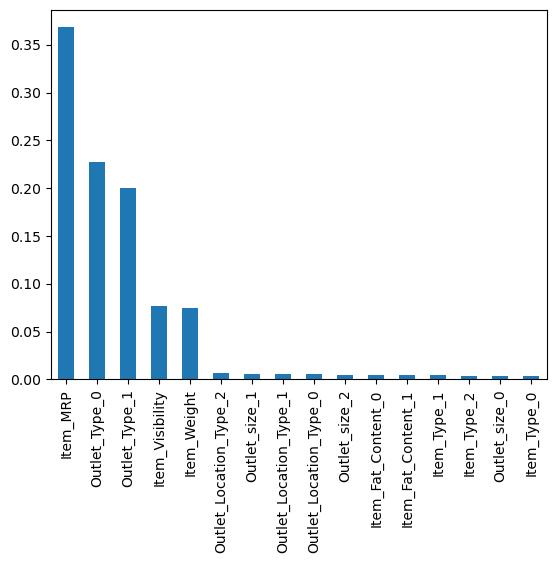

In [67]:
coef=pd.Series(rf.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind='bar')
plt.show()

In [68]:
from sklearn.feature_selection import SelectFromModel
sfm=SelectFromModel(rf)
sfm=sfm.fit(x_train,y_train)

In [69]:
rf_xtrain=sfm.transform(x_train)
rf_xtest=sfm.transform(x_test)

In [70]:
rf_new=rf.fit(rf_xtrain,y_train)

In [71]:
rf_new_pred=rf_new.predict(rf_xtest)
rf_new_acc=r2_score(y_test,rf_new_pred)
rf_new_acc

0.6833240428297881

In [72]:
rf_new_pred1=rf_new.predict(rf_xtrain)
rf_new_acc1=r2_score(y_train,rf_new_pred1)
rf_new_acc1

0.9544207841630119

In [73]:
rf1=RandomForestRegressor(n_estimators=500)

In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [75]:
kfold=KFold(n_splits=10)
skfold=StratifiedKFold(n_splits=10)

In [76]:
#cv=cross_val_score(rf1,x_train,y_train,cv=kfold)
#print("Result :",cv)
#print("Average :",cv.mean())
#print("STD :",cv.std())

In [77]:
#KNN

In [78]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [79]:
from sklearn.neighbors import KNeighborsRegressor
rmse=[]
for k in range(50):
    k=k+1
    knn=KNeighborsRegressor(n_neighbors=k)
    knn=knn.fit(x_train,y_train)
    knn_pred=knn.predict(x_test)
    error=sqrt(mean_squared_error(y_test,knn_pred))
    rmse.append(error)
    print("rmse of k",k,'is = ',error)

rmse of k 1 is =  0.7634677030796237
rmse of k 2 is =  0.6699900410358619
rmse of k 3 is =  0.6326715864917074
rmse of k 4 is =  0.6130428292544893
rmse of k 5 is =  0.5991494694242759
rmse of k 6 is =  0.5936161583859833
rmse of k 7 is =  0.5901414994535917
rmse of k 8 is =  0.5881014800753118
rmse of k 9 is =  0.5873547460096251
rmse of k 10 is =  0.5849368675842481
rmse of k 11 is =  0.581629135310645
rmse of k 12 is =  0.5816338611762055
rmse of k 13 is =  0.5806906621153685
rmse of k 14 is =  0.5792743163436682
rmse of k 15 is =  0.5784086090542009
rmse of k 16 is =  0.5788589155477261
rmse of k 17 is =  0.5789898254563293
rmse of k 18 is =  0.5789683876063976
rmse of k 19 is =  0.5782067837213789
rmse of k 20 is =  0.5794578798599375
rmse of k 21 is =  0.5803973221177043
rmse of k 22 is =  0.5810966736041311
rmse of k 23 is =  0.5809130561644308
rmse of k 24 is =  0.5822280891905584
rmse of k 25 is =  0.5828506226038824
rmse of k 26 is =  0.5824768824346933
rmse of k 27 is =  0.5

In [80]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=15)
knn=knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)


In [81]:
knn_acc=r2_score(y_test,knn_pred)
knn_acc

0.6817820911170813

In [82]:
knn_pred1=knn.predict(x_train)
knn_acc1=r2_score(y_train,knn_pred1)
knn_acc1

0.7211448599800352

In [83]:
# Boosting Algorithm

In [84]:
from sklearn.ensemble import AdaBoostRegressor
adaboost=AdaBoostRegressor(n_estimators=10,base_estimator=rf,learning_rate=1)
adaboost=adaboost.fit(x_train,y_train)

In [85]:
ada_pred=adaboost.predict(x_test)
ada_acc=r2_score(y_test,ada_pred)
ada_acc

0.706444774225021

In [86]:
kfold=KFold(n_splits=10)
skfold=StratifiedKFold(n_splits=10)

In [87]:
#cv=cross_val_score(knn,x_train,y_train,cv=kfold)
#print("Result :",cv)
#print("Average :",cv.mean())
#print("STD :",cv.std())

In [88]:
cv1=cross_val_score(lr,x_train,y_train,cv=kfold)
print("Result :",cv1)
print("Average :",cv1.mean())
print("STD :",cv1.std())

Result : [0.68239083 0.69610188 0.67650526 0.66517867 0.6854902  0.67970895
 0.67323282 0.72933801 0.68993482 0.7010139 ]
Average : 0.6878895331110542
STD : 0.01710254219357417


In [89]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr=svr.fit(x_train,y_train)


In [90]:
svr_pred=svr.predict(x_test)
svr_acc=r2_score(y_test,svr_pred)
svr_acc

0.7170732587910478

In [91]:
svr_pred1=svr.predict(x_train)
svr_acc1=r2_score(y_train,svr_pred1)
svr_acc1

0.7243551024642161

In [92]:
param_distribution={'weights' : ['uniform', 'distance'],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],'leaf_size' :[30,45,60], 'p' :[1,2]}  

In [93]:
# Random Search CV

In [94]:
from sklearn.model_selection import RandomizedSearchCV
rs=RandomizedSearchCV(estimator=knn,param_distributions=param_distribution,cv=10,return_train_score=True,scoring=r2_score)
rs=rs.fit(x_train,y_train)
rs.best_params_

{'weights': 'uniform', 'p': 2, 'leaf_size': 45, 'algorithm': 'brute'}

In [95]:
rs.best_estimator_

KNeighborsRegressor(algorithm='brute', leaf_size=45, n_neighbors=15)

In [96]:
knn_best_param=KNeighborsRegressor(n_neighbors=50,p=1,weights='uniform',algorithm='auto',leaf_size=60)
knn_best_param=knn_best_param.fit(x_train,y_train)
knn_best_param_pred=knn_best_param.predict(x_test)
knn_best_param_acc=r2_score(y_test,knn_best_param_pred)
knn_best_param_acc

0.6646152197006069

In [97]:
# XG boost

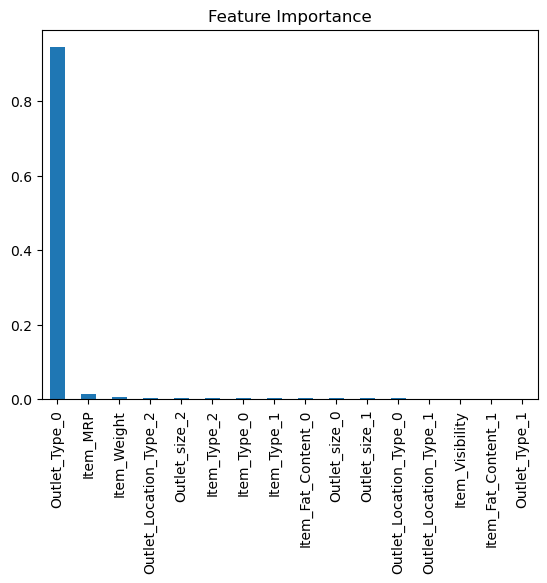

XGBoost - R2:  0.6677696779843112


In [98]:
from xgboost import XGBRegressor
xgr = XGBRegressor(max_depth=100)
xgr.fit(x_train, y_train)
coef = pd.Series(xgr.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()
y_pred2 = xgr.predict(x_test)
print("XGBoost - R2: ", r2_score(y_test, y_pred2))

In [99]:
from scipy.stats import uniform, randint
params_lgr= {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 16
[LightGBM] [Info] Start training from score 7.309469


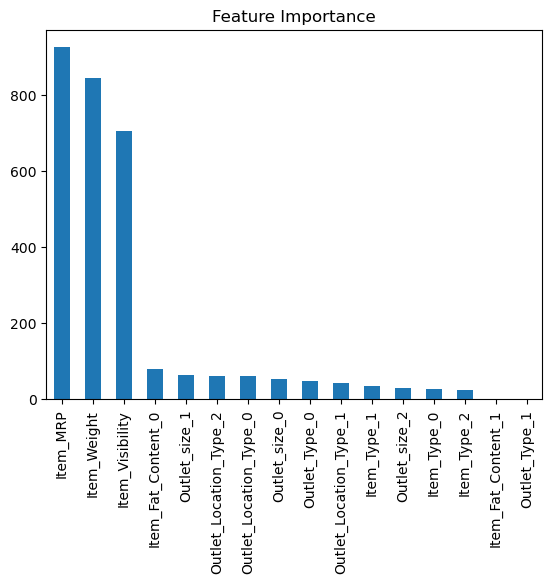

LightGBM - R2:  0.7360788293200091


In [100]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
lgr = LGBMRegressor(force_row_wise=True)
lgr.fit(x_train, y_train)
coef = pd.Series(lgr.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()
y_pred5 = lgr.predict(x_test)
print("LightGBM - R2: ",r2_score(y_test, y_pred5))

In [101]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "n_estimators"     : [100, 150,200],
    "subsample"     : [0.6, 0.4]   
    }

In [102]:
#rs2=RandomizedSearchCV(estimator=lgr,param_distributions=params_lgr,cv=5,return_train_score=False,n_iter=100,verbose=2,n_jobs=1)
#rs2=rs2.fit(x_train,y_train)
#rs2.best_params_

In [103]:
lgr = LGBMRegressor(force_row_wise=True,learning_rate=0.1,n_estimators=139,subsample=0.87,max_depth=2)
lgr.fit(x_train, y_train)
y_pred5 = lgr.predict(x_test)
print("LightGBM - R2: ",r2_score(y_test, y_pred5))

[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 16
[LightGBM] [Info] Start training from score 7.309469
LightGBM - R2:  0.74131770274813


In [104]:
#rs1=RandomizedSearchCV(estimator=xgr,param_distributions=params,cv=5,return_train_score=True,n_iter=100,verbose=2,n_jobs=1)
#rs1=rs1.fit(x_train,y_train)
#rs1.best_params_

In [105]:
#xgr = XGBRegressor(max_depth=100,min_child_weight=7,learning_rate=0.05,gamma=0.0,colsample_bytree=0.7,n_estimator=200,subsample=0.6)
#xgr.fit(x_train, y_train)
#y_pred2 = xgr.predict(x_test)
#print("XGBoost - R2: ", r2_score(y_test, y_pred2))

In [106]:
RandomForestRegressor()

RandomForestRegressor()

In [107]:
params_rf={'criterion' : ["squared_error", "absolute_error", "poisson"],
            'max_depth' :[1,2,3,4,5],
            'min_samples_split':[2,4,6,8,10],
            'min_samples_leaf':[1,2,5,10],
            'min_weight_fraction_leaf':[0.0,0.1,0.2,0.3,0.4,0.5],
            'max_features' : ["auto", "sqrt", "log2"]}

In [108]:
#rs3=RandomizedSearchCV(estimator=rf,param_distributions=params_rf,cv=5,return_train_score=True,n_iter=100,verbose=2,n_jobs=1)
#rs3=rs3.fit(x_train,y_train)
#rs3.best_params_

In [109]:
{'min_weight_fraction_leaf': 0.1,
 'min_samples_split': 4,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 3,
 'criterion': 'squared_error'}

{'min_weight_fraction_leaf': 0.1,
 'min_samples_split': 4,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 3,
 'criterion': 'squared_error'}

In [110]:
rf_best=RandomForestRegressor(n_estimators=500,min_weight_fraction_leaf=0.1,min_samples_split=4,min_samples_leaf=10,max_features='auto',max_depth=10,criterion='squared_error')
rf_best=rf_best.fit(x_train,y_train)

In [111]:
rf_best_pred=rf_best.predict(x_test)
rf_best_acc=r2_score(y_test,rf_best_pred)
rf_best_acc

0.6783106409211864

In [112]:
adaboost=AdaBoostRegressor(n_estimators=10,base_estimator=rf_best,learning_rate=1)
adaboost=adaboost.fit(x_train,y_train)

In [113]:
ada_pred=adaboost.predict(x_test)
ada_acc=r2_score(y_test,ada_pred)
print("Final Random Forest Accuracy",ada_acc)

Final Random Forest Accuracy 0.6756293269584797


In [114]:
adaboost_knn=AdaBoostRegressor(n_estimators=10,base_estimator=knn,learning_rate=1)
adaboost_knn=adaboost_knn.fit(x_train,y_train)

In [115]:
ada_knn_pred=adaboost_knn.predict(x_test)
ada_knn_acc=r2_score(y_test,ada_knn_pred)
print("Final KNN Accuracy",ada_knn_acc)

Final KNN Accuracy 0.640973485184095


In [116]:
#SVR
svr1=SVR(kernel='rbf',C=1.0,degree=10,gamma='auto')
svr1=svr1.fit(x_train,y_train)

In [117]:
svr1_pred=svr1.predict(x_test)
svr1_acc=r2_score(y_test,svr1_pred)
print("Final SVR Accuracy",svr1_acc)

Final SVR Accuracy 0.7170781894802727


In [118]:
lgr1= LGBMRegressor(force_row_wise=False,learning_rate=0.25,n_estimators=138,subsample=0.87,max_depth=2)
lgr1=lgr1.fit(x_train, y_train)
lgr1_pred = lgr1.predict(x_test)
print("LightGBM - R2: ",r2_score(y_test,lgr1_pred))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 16
[LightGBM] [Info] Start training from score 7.309469
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM - R2:  0.742610655099714


In [119]:
lgr2=lgr1.fit(x,y)
lgr2_pred = lgr2.predict(x)
print("LightGBM - R2: ",r2_score(y,lgr2_pred))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 8523, number of used features: 16
[LightGBM] [Info] Start training from score 7.297863
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM - R2:  0.7490372499997298


In [120]:
print("LGBM REGRESSOR accuracy for complete dataset is ",r2_score(y,lgr2_pred)*100)

LGBM REGRESSOR accuracy for complete dataset is  74.90372499997298


In [121]:
df1

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_size,Item_Weight
0,0,0.016047,1,249.8092,1999,0,1,3735.1380,1,9.300
1,1,0.019278,0,48.2692,2009,2,1,443.4228,1,5.920
2,0,0.016760,1,141.6180,1999,0,1,2097.2700,1,17.500
3,1,0.000000,1,182.0950,1998,2,0,732.3800,1,19.200
4,0,0.000000,2,53.8614,1987,2,1,994.7052,0,8.930
...,...,...,...,...,...,...,...,...,...,...
8518,0,0.056783,1,214.5218,1987,2,1,2778.3834,0,6.865
8519,1,0.046982,1,108.1570,2002,1,1,549.2850,1,8.380
8520,0,0.035186,2,85.1224,2004,1,1,1193.1136,2,10.600
8521,1,0.145221,1,103.1332,2009,2,1,1845.5976,1,7.210


In [122]:
predicted_sales=pd.DataFrame(lgr2_pred,columns=['predicted_sales'])
predicted_sales

,predicted_sales
0,8.205417
1,6.403194
2,7.629828
3,6.032098
4,6.641208
...,...
8518,7.945835
8519,7.243426
8520,7.186639
8521,7.253375


In [123]:
df2

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_size_0,Outlet_size_1,Outlet_size_2
0,0.016047,249.8092,1999,8.225808,9.300,1,0,0,1,0,1,0,0,0,1,0,1,0
1,0.019278,48.2692,2009,6.096776,5.920,0,1,1,0,0,0,0,1,0,1,0,1,0
2,0.016760,141.6180,1999,7.648868,17.500,1,0,0,1,0,1,0,0,0,1,0,1,0
3,0.000000,182.0950,1998,6.597664,19.200,0,1,0,1,0,0,0,1,1,0,0,1,0
4,0.000000,53.8614,1987,6.903451,8.930,1,0,0,0,1,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.056783,214.5218,1987,7.929984,6.865,1,0,0,1,0,0,0,1,0,1,1,0,0
8519,0.046982,108.1570,2002,6.310436,8.380,0,1,0,1,0,0,1,0,0,1,0,1,0
8520,0.035186,85.1224,2004,7.085159,10.600,1,0,0,0,1,0,1,0,0,1,0,0,1
8521,0.145221,103.1332,2009,7.521100,7.210,0,1,0,1,0,0,0,1,0,1,0,1,0


In [124]:
final_df=df2.iloc[:,:4]
final_df_col=final_df.columns
final_df=pd.DataFrame(final_df,columns=final_df_col)
final_df

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,0.016047,249.8092,1999,8.225808
1,0.019278,48.2692,2009,6.096776
2,0.016760,141.6180,1999,7.648868
3,0.000000,182.0950,1998,6.597664
4,0.000000,53.8614,1987,6.903451
...,...,...,...,...
8518,0.056783,214.5218,1987,7.929984
8519,0.046982,108.1570,2002,6.310436
8520,0.035186,85.1224,2004,7.085159
8521,0.145221,103.1332,2009,7.521100


In [125]:
predicted_df=pd.concat([final_df,predicted_sales],axis=1)
predicted_df

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,predicted_sales
0,0.016047,249.8092,1999,8.225808,8.205417
1,0.019278,48.2692,2009,6.096776,6.403194
2,0.016760,141.6180,1999,7.648868,7.629828
3,0.000000,182.0950,1998,6.597664,6.032098
4,0.000000,53.8614,1987,6.903451,6.641208
...,...,...,...,...,...
8518,0.056783,214.5218,1987,7.929984,7.945835
8519,0.046982,108.1570,2002,6.310436,7.243426
8520,0.035186,85.1224,2004,7.085159,7.186639
8521,0.145221,103.1332,2009,7.521100,7.253375


In [134]:
predicted_df.to_excel('C:\\Users\\DELL\\OneDrive\\Desktop\DS Project\\PRJ Sales Forecasting\\Predicted_sales.xlsx')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

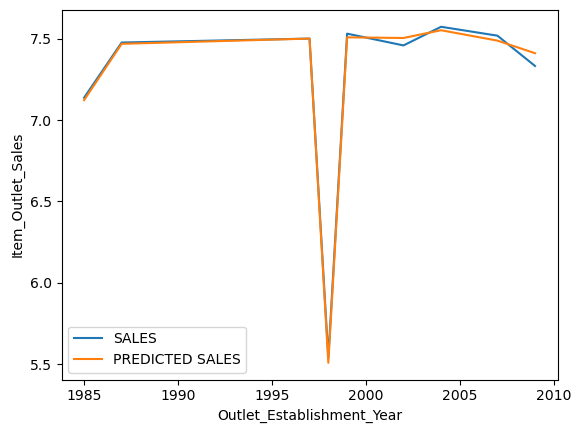

In [145]:
sns.lineplot(data=predicted_df,x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ci=None,label='SALES')
sns.lineplot(data=predicted_df,x='Outlet_Establishment_Year',y='predicted_sales',ci=None,label='PREDICTED SALES')